In [93]:
import numpy as np 
import matplotlib.pyplot as plt

## Descrição da função utilizada


### Essa função é uma função definida por partes que calcula um valor para y baseado no valor de entrada x.

### Se x for menor que -1 ou maior que 1, a função retornará 0. Caso contrário, a função retornará o resultado da soma das funções cos(50x) e sin(20x).

### Essa função é um exemplo de uma função periódica, pois é composta por duas funções trigonométricas que se repetem periodicamente ao longo do eixo x. Além disso, a função só é não-zero dentro do intervalo limitado entre -1 e 1.

In [147]:
def function(x):
    if x < -1 or x > 1:
        y = 0
    else:
        y =(np.cos(50*x) + np.sin(20*x))
    
    return y

hv = np.vectorize(function)

Analisando o sinal gerado

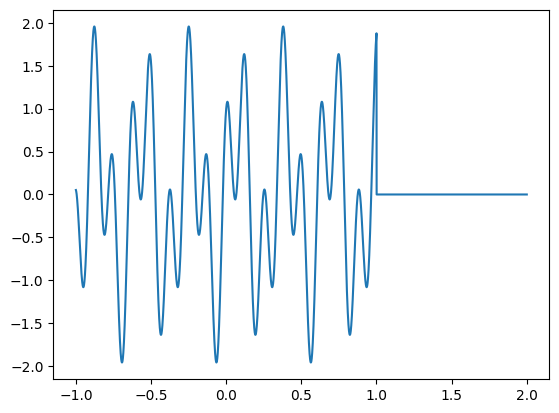

In [148]:
X = np.linspace(-1, 2, num=10000)

plt.plot(X, hv(X))

## Testando com um Slimples greedy Search

### Esse algoritmo é uma implementação de busca gulosa simples para encontrar o máximo local de uma função unidimensional.

### A ideia é começar com um valor inicial start e, em seguida, iterativamente analisar os valores da função nos vizinhos à direita e à esquerda do valor atual x. Em cada iteração, o algoritmo move para o vizinho que tem o maior valor da função. Isso é feito sob a suposição de que o máximo local estará próximo ao valor atual x.

### A variável u é usada para definir a distância entre x e seus vizinhos. Quanto menor u, maior é a precisão do algoritmo, mas também pode aumentar o tempo de execução. O número de iterações é definido pelo parâmetro N.

### O resultado da busca é o valor x que maximiza a função e uma lista history com os valores de x em cada iteração. A lista history pode ser usada para visualizar o processo de busca e a convergência para o máximo local.

### É importante notar que este algoritmo só é garantido para encontrar o máximo local e não o máximo global, ou seja, a melhor solução pode estar em um ponto diferente do encontrado. Além disso, o algoritmo pode ficar preso em um ótimo local se a função tiver vários máximos locais próximos.

In [149]:
def simple_greedy_search(func, start=0, N=1000):
    x = start 
    history = []
    for i in range(N):
        history.append(x) # Mantém o histório dos passos 
        u = 0.001
        xleft, xright = x-u, x+u  # Análisa os vizinhos
        yleft, yright = func(xleft), func(xright)

        if yleft > yright:
            x = xleft
        else:
            x = xright
        

    return x, history

In [150]:
x0, history = simple_greedy_search(hv, start=0.02, N = 10000)

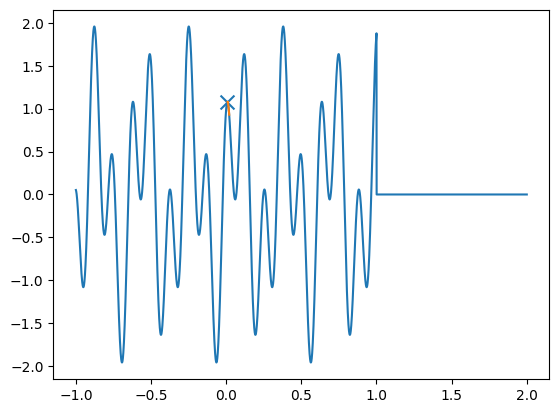

In [151]:
plt.plot(X, hv(X))
plt.scatter(x0, function(x0), marker='x', s=100)
plt.plot(history, hv(history))

In [152]:
def simulated_annealing(search_space, func, T, interations):
    scale = np.sqrt(T)
    start = np.random.choice(search_space)
    x = start * 1
    cur = func(x)
    history = [x]
    for i in range(interations):
        prop = x + np.random.normal()*scale
        if prop > 1 or prop < 0 or np.log(np.random.rand()) * T > (func(prop) - cur):
            prop = x 
        x = prop
        cur = func(x)
        T = 0.9 * T
        history.append(x)

    return x, history

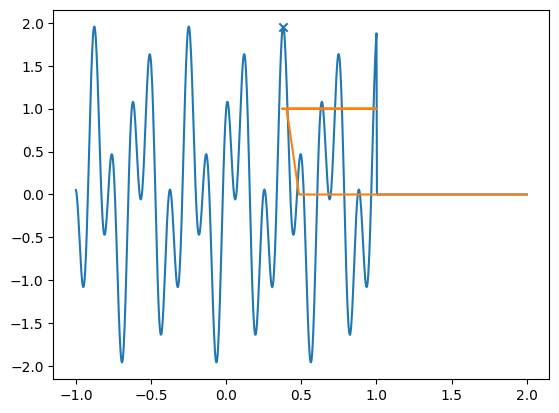

In [153]:
X = np.linspace(-1 , 2, num=1000)
x1, history = simulated_annealing(X, function, T=4, interations=1000)

plt.plot(X, hv(X))
plt.scatter(x1,hv(x1), marker='x')
plt.plot(history, hv(history))

## Repetindo o mesmo processo com outra função

In [154]:
def function(x):
    y = 2 ** -2*(x-0.1/0.9)**2 * (np.sin(5*np.pi * x))**6
    return y

hv = np.vectorize(function)

Analisando o sinal gerado

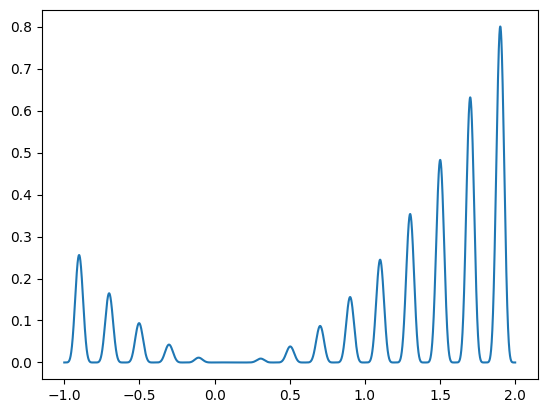

In [155]:
X = np.linspace(-1, 2, num=10000)

plt.plot(X, hv(X))

### Encontrando o ponto máximo atráves do greedy search

In [156]:
x0, history = simple_greedy_search(hv, start=0.02, N = 10000)

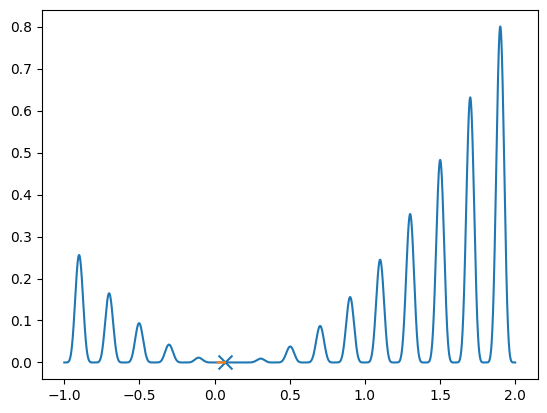

In [157]:
plt.plot(X, hv(X))
plt.scatter(x0, function(x0), marker='x', s=100)
plt.plot(history, hv(history))

### Encontrando o ponto máximo atráves do simulated annealing

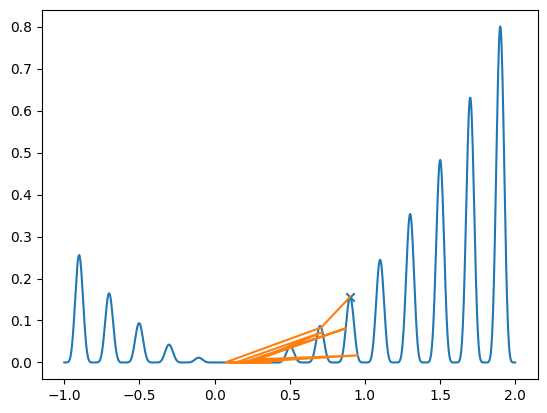

In [158]:
X = np.linspace(-1 , 2, num=1000)
x1, history = simulated_annealing(X, function, T=4, interations=1000)

plt.plot(X, hv(X))
plt.scatter(x1,hv(x1), marker='x')
plt.plot(history, hv(history))

É possível perceber que, diferente da primeira função, apenas 1000 interações não foram suficientes para resolver o problema de maneira satisfatória. É notável também que a função em questão tem picos e vales bem mais acentuados.

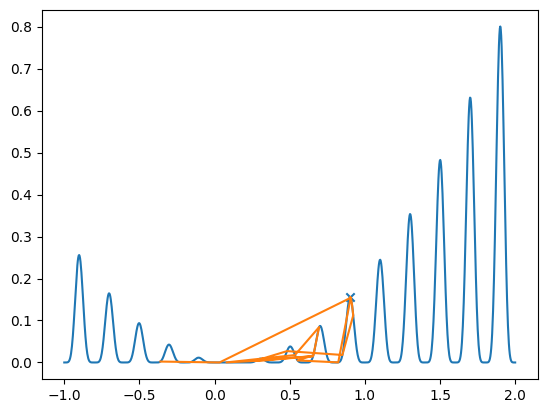

In [175]:
X = np.linspace(-1 , 2, num=1000)
x1, history = simulated_annealing(X, function, T=1, interations=200000)

plt.plot(X, hv(X))
plt.scatter(x1,hv(x1), marker='x')
plt.plot(history, hv(history))

Pode-se analisar que para função acima o algoritmo simulated annealing não vai conseguir trazer melhores resultados mesmo aumentando consideravelmente o número de interações e alterando os valores de temperatura

In [101]:
class Coordinate():
    def __init__(self, x, y) -> None:
        self.x = x
        self.y = y

    @staticmethod
    def get_distance(a, b):
        return np.sqrt(np.abs(a.x - b.x) + np.abs(a.y - b.y))
    @staticmethod
    def get_total_distance(coords):
        dist = 0
        for first, second in zip(coords[:-1], coords[1:]):
            dist += Coordinate.get_distance(first, second)
        dist += Coordinate.get_distance(coords[0], coords[-1])
        return dist

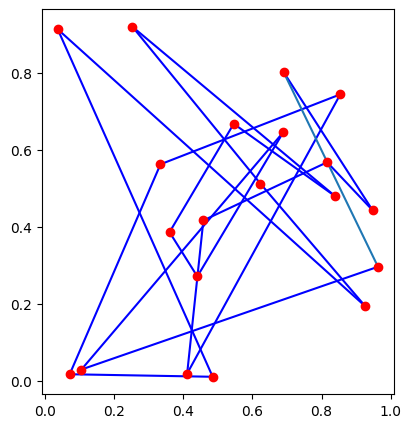

In [172]:
coords = []

for i in range(20):
    coords.append(Coordinate(np.random.uniform(), np.random.uniform()))

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
for first, second in zip(coords[:-1], coords[1:]):
    ax1.plot([first.x, second.x], [first.y, second.y], 'b')
 
ax1.plot([coords[0].x, coords[-1].x], [coords[0].y, coords[-1].y], 'b')


for c in coords:
    ax1.plot(c.x, c.y, 'ro')


plt.show()


In [103]:
cost0 = Coordinate.get_total_distance(coords)

T=30
factor = 0.99
T_init = T
 
for i in range(1000):
    print(i, 'cost =', cost0)

    T = T*factor
    for j in range(500):
        # Exchange two coordinates and get a new neighbour solution 
        r1, r2 = np.random.randint(0,len(coords), size = 2)
        temp = coords[r1]
        coords[r1] = coords[r2]
        coords[r2] = temp

        cost1 = Coordinate.get_total_distance(coords)

        if cost1 < cost0:
            cost0 = cost1
        else:
            x = np.random.uniform()
            if x < np.exp((cost0-cost1)/T):
                cost0 = cost1
            else:
                temp = coords[r1]
                coords[r1] = coords[r2]
                coords[r2] = temp


0 cost = 16.716275584496223
1 cost = 16.10772451386907
2 cost = 16.052415986030073
3 cost = 16.27056992895527
4 cost = 14.544467480062766
5 cost = 14.697464983107649
6 cost = 16.90950919533723
7 cost = 14.53422427364522
8 cost = 15.745608365492966
9 cost = 14.37478343738726
10 cost = 14.646932398856695
11 cost = 15.83903860717582
12 cost = 16.19956717619789
13 cost = 15.072521540342954
14 cost = 13.776694124122749
15 cost = 16.21780091219412
16 cost = 16.040043925324
17 cost = 14.925378068314304
18 cost = 13.936183819055602
19 cost = 15.091270824779162
20 cost = 15.70612666617706
21 cost = 14.702651632872197
22 cost = 15.807102244631167
23 cost = 13.699617911739173
24 cost = 14.439853849301771
25 cost = 15.378816792162686
26 cost = 13.424212669320088
27 cost = 15.374042620200306
28 cost = 14.956186995130992
29 cost = 15.534333423733674
30 cost = 16.493889905359925
31 cost = 16.12844043729505
32 cost = 15.859607316924802
33 cost = 16.247158689669902
34 cost = 16.3145420068137
35 cost = 

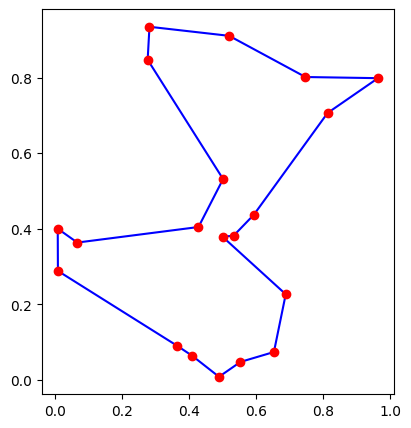

In [104]:
fig = plt.figure(figsize=(10,5))
ax2 = fig.add_subplot(121)
for first, second in zip(coords[:-1], coords[1:]):
    ax2.plot([first.x, second.x], [first.y, second.y], 'b')

ax2.plot([coords[0].x, coords[-1].x], [coords[0].y, coords[-1].y], 'b')


for c in coords:
    ax2.plot(c.x, c.y, 'ro')


plt.show()